#1. Analyze Data 1 and Data 2 using linear regression

(a) Plot J(w) against iteration.

(b) Plot J(w) against w obtained in each iteration for Data 1.

(c) Plot the hyperplane that generates the data.

(d) Describe the experimental procedures used.

(e) Report the parameters of the model




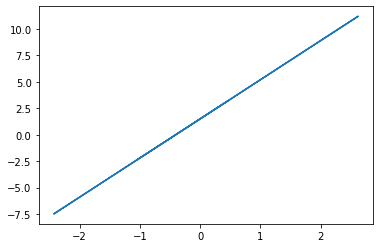

In [1]:
# Getting the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data_file = pd.read_csv("data1.csv",header=None)

# Inserting a column "w0" with all values 1 at position 0
data_file.insert(0,column='wo',value=1)
data_set = np.array(data_file)

# Plotting the data
plt.plot(data_file[0],data_file[1])
plt.show()

In [2]:
# Taking 20% of data for testing
testing_set = data_set[int(0.8*len(data_set)):]

# And Using remaining data for model development
data = data_set[:int(0.8*len(data_set))]


In [3]:
#  Cross Validation
#  For each value of alpha , iterating 100 times and in each iteration using 75% data of "data" as training set and remaining 25% as validation set
#  For each value of alpha , cost function is stored in "alpha_data"
#  For each value of alpha , for each iteration the cost function is stored in "performance_data"

alpha_data = [[],[]]
performance_data = [[],[]]
for k in [0.001,0.002,0.005,0.007,0.01,0.02,0.05,0.08,0.1,0.3,0.5,0.8,1,1.2,1.5,1.8,2.0,2.2,2.5,2.7,3.0,10]:
  a = k
  performance = [[],[]]
  for j in range(100):
    w = np.random.rand(2)
    np.random.shuffle(data)
    training = data[0:int(0.6*len(data_set))]
    validation  = data[int(0.6*len(data_set)):]
    for i in range(len(training)):
      diff = training[i][2] - np.inner(w,training[i][:2])
      delta_w =  a * ( diff ) * training[i][:2]
      w = w + delta_w
    cost_fn = 0
    for i in range(len(validation)):
      error = validation[i][2] - np.inner(w,validation[i][:2])
      cost_fn += error
    cost_fn *= 0.5
    performance[0].append(j)
    performance[1].append(cost_fn)
  performance_data[0].append(k)
  performance_data[1].append(performance)
  alpha_data[0].append(k)
  alpha_data[1].append(performance[1][-1])





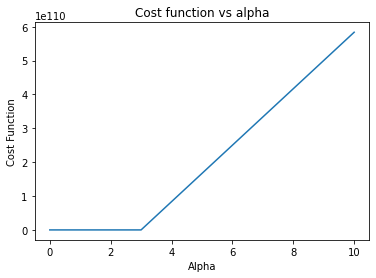

In [4]:
# Plotting cost function vs alpha

plt.plot(alpha_data[0],alpha_data[1])
plt.xlabel("Alpha")
plt.ylabel("Cost Function")
plt.title("Cost function vs alpha")
plt.show()

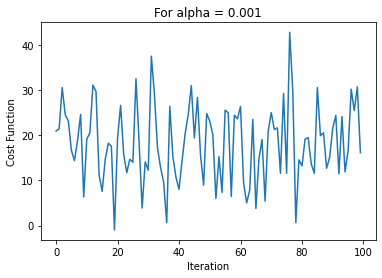

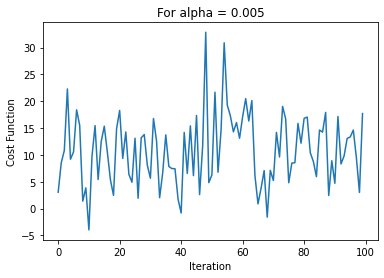

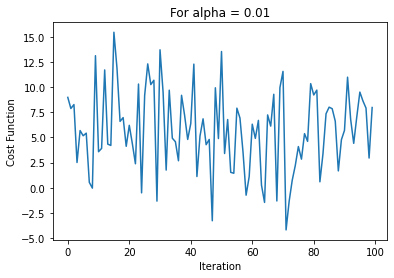

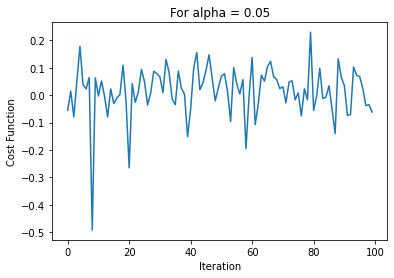

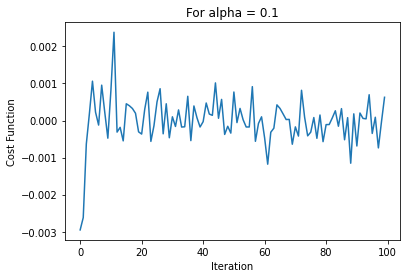

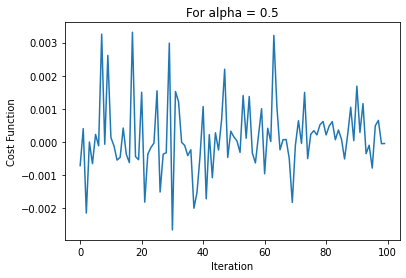

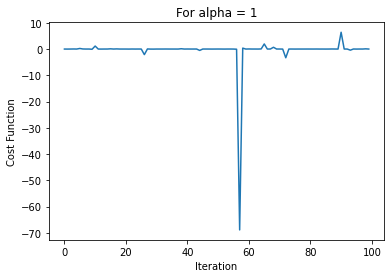

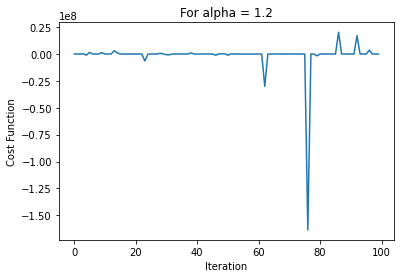

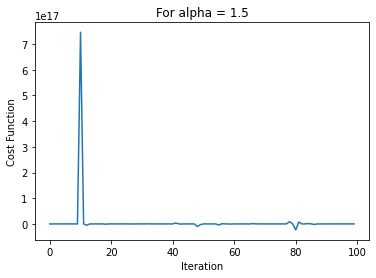

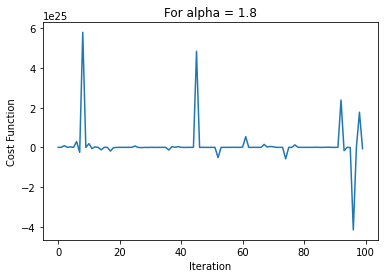

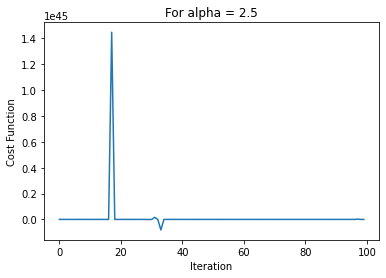

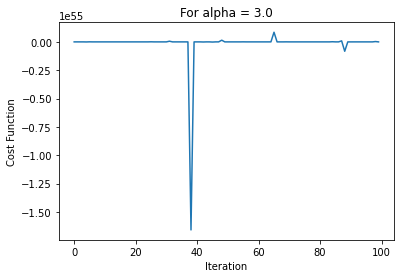

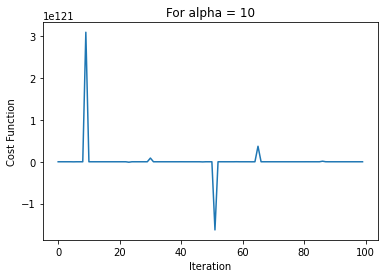

In [5]:
# Plotting Cost function vs Iteration for selected values of alpha
# alpha = [0.001,0.005,0.01,0.05,0.1,0.5,0.8,1,1.2,1.5,1.8,2.5,3.0,10]
alpha_set = [0.001,0.005,0.01,0.05,0.1,0.5,0.9,1,1.2,1.5,1.8,2.5,3.0,10]
for i in range(len(performance_data[0])):
  if performance_data[0][i] in alpha_set:
    plt.plot(performance_data[1][i][0],performance_data[1][i][1])
    plt.xlabel("Iteration")
    plt.ylabel("Cost Function")
    plt.title(f"For alpha = {performance_data[0][i]}")
    plt.show()

In [6]:
# Taking alpha = 0.1
# Using 60% of total data for training , 20% for validation and 20% for testing

np.random.shuffle(data)

training_data = data[0:int(0.6*len(data_set))]
validation_data = data[int(0.6*len(data_set)):]

# Initializing the random weights
w = np.random.rand(2)

a = 0.1
j = 0

cost_fn_sum = 10
cost_fn_sum_new = 100

cost_fn_data = [[],[],[],[]]

while(abs(cost_fn_sum_new-cost_fn_sum)!=0):

  cost_fn_sum = cost_fn_sum_new
  cost_fn_sum_new = 0
  
  # Training
  for i in range(len(training_data)):
    diff = training_data[i][2] - np.inner(w,training_data[i][:2])
    delta_w =  a * ( diff ) * training_data[i][:2]
    w = w + delta_w
    #print(f"Loop : {j} ; Iteration : {i}; delta_w : {list(delta_w)} ; wnew : {list(w)}")

  # Validation
  for i in range(len(validation_data)):
    diff = validation_data[i][2] - np.inner(w,validation_data[i][:2])
    cost_fn_sum_new += diff**2


  cost_fn_data[0].append(j)
  cost_fn_data[1].append(w[0])
  cost_fn_data[2].append(w[1])
  cost_fn_data[3].append(0.5*cost_fn_sum_new)
  j+=1
  print(cost_fn_sum_new)

1.7154609171432576e-07
1.7250536175521416e-07
1.725053619616834e-07
1.725053619616834e-07


In [7]:
# Parameters
print(w)

[1.49999591 3.70001337]


In [8]:
# Testing
cost_fn_sum = 0
error_data = [[],[]]
for i in range(len(testing_set)):
  diff = testing_set[i][2] - np.inner(w,testing_set[i][:2])
  cost_fn_sum += diff**2
  error_data[0].append(i)
  error_data[1].append(0.5*(diff**2))
cost_fn_sum

3.39877731158977e-07

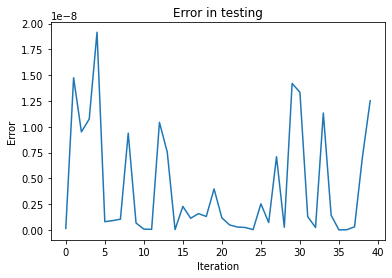

In [9]:
# Plotting testing error

plt.plot(error_data[0],error_data[1])
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error in testing")
plt.show()

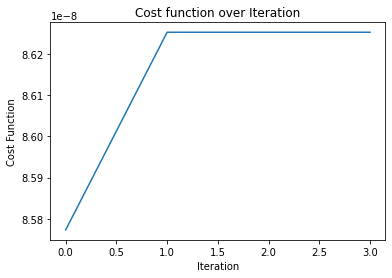

In [10]:
# Plot J(w) against iteration
plt.plot(cost_fn_data[0],cost_fn_data[3])
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost function over Iteration")
plt.show()

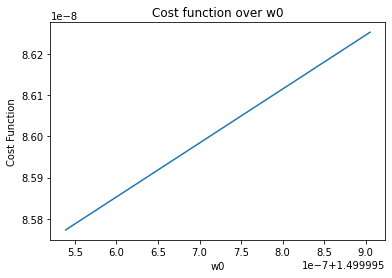

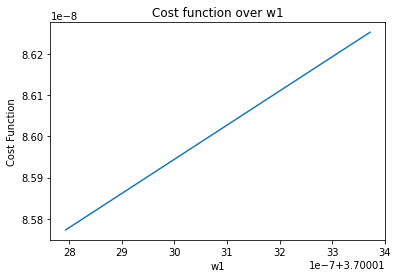

In [11]:
# Plot J(w) against w obtained in each iteration for Data 1

plt.plot(cost_fn_data[1],cost_fn_data[3])
plt.xlabel("w0")
plt.ylabel("Cost Function")
plt.title("Cost function over w0")
plt.show()

plt.plot(cost_fn_data[2],cost_fn_data[3])
plt.xlabel("w1")
plt.ylabel("Cost Function")
plt.title("Cost function over w1")
plt.show()

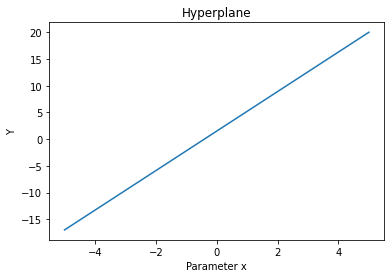

In [12]:
#Plotting the hyperplane

# y = w0 + w1x

x = np.linspace(-5,5,100)

y = w[0] + w[1] * x

plt.plot(x,y)
plt.xlabel("Parameter x")
plt.ylabel("Y")
plt.title("Hyperplane")
plt.show()


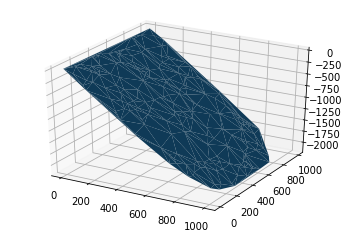

In [13]:
data_file = pd.read_csv("/content/drive/MyDrive/data2.csv",header=None)

# Inserting a column "w0" with all values 1 at position 0
data_file.insert(0,column='wo',value=1)
data_set = np.array(data_file)

# Plotting the data
fig = plt.figure()
ax = fig.gca(projection = "3d")
ax.plot_trisurf(data_file[0],data_file[1],data_file[2])
plt.show()

In [14]:
# Taking 20% of data for testing
testing_set = data_set[int(0.8*len(data_set)):]

# And Using remaining data for model development
data = data_set[:int(0.8*len(data_set))]

In [15]:
#  Cross Validation
#  For each value of alpha , iterating 100 times and in each iteration using 75% data of "data" as training set and remaining 25% as validation set
#  For each value of alpha , cost function is stored in "alpha_data"
#  For each value of alpha , for each iteration the cost function is stored in "performance_data"

alpha_data = [[],[]]
performance_data = [[],[]]
alpha_set = [0.00000001,0.00000005,0.0000001,0.0000005,0.000001,0.00001,0.00005,0.0001,0.0005]
for k in alpha_set :

  a = k
  performance = [[],[]]

  for j in range(100):

    w = np.random.rand(3)
    np.random.shuffle(data)

    training = data[0:int(0.6*len(data_set))]
    validation  = data[int(0.6*len(data_set)):]

    for i in range(len(training)):
      diff = training[i][3] - np.inner(w,training[i][:3])
      delta_w =  a * ( diff ) * training[i][:3]
      w = w + delta_w
    cost_fn = 0

    for i in range(len(validation)):
      error = validation[i][3] - np.inner(w,validation[i][:3])
      cost_fn += error
    cost_fn *= 0.5

    performance[0].append(j)
    performance[1].append(cost_fn)

  performance_data[0].append(k)
  performance_data[1].append(performance)
  alpha_data[0].append(k)
  alpha_data[1].append(performance[1][-1])

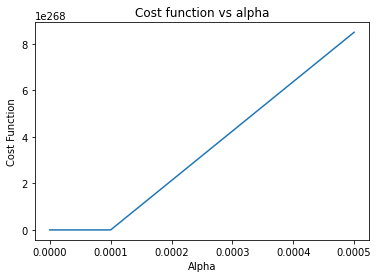

In [16]:
# Plotting cost function vs alpha

plt.plot(alpha_data[0],alpha_data[1])
plt.xlabel("Alpha")
plt.ylabel("Cost Function")
plt.title("Cost function vs alpha")
plt.show()

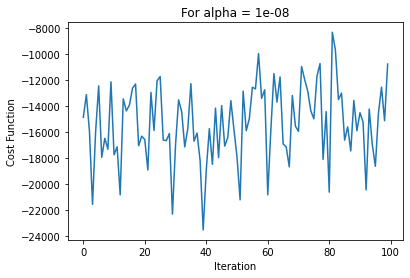

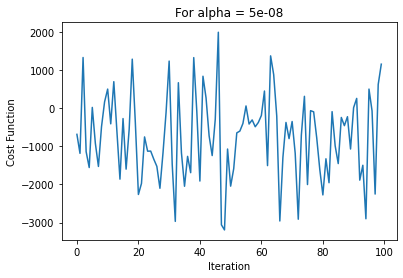

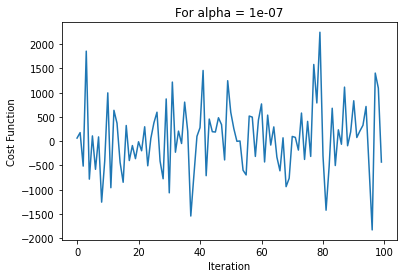

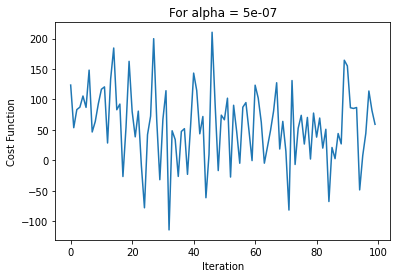

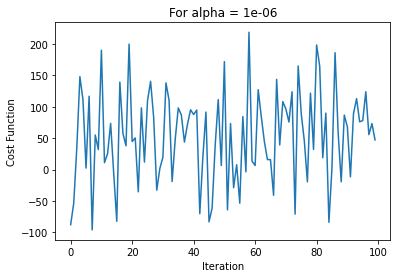

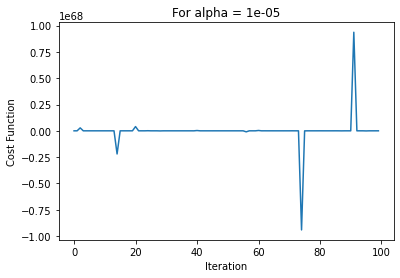

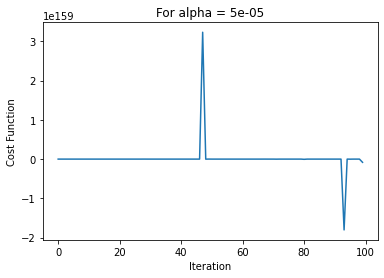

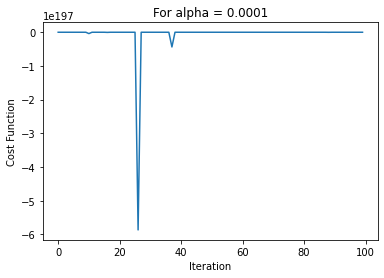

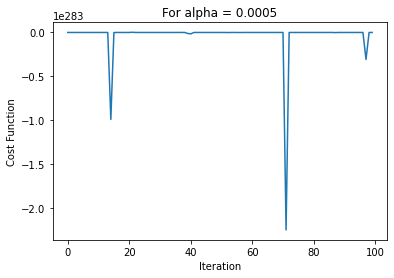

In [17]:

for i in range(len(performance_data[0])):
  if performance_data[0][i] in alpha_set:
    plt.plot(performance_data[1][i][0],performance_data[1][i][1])
    plt.xlabel("Iteration")
    plt.ylabel("Cost Function")
    plt.title(f"For alpha = {performance_data[0][i]}")
    plt.show()

In [18]:
# Taking alpha = 0.1
# Using 60% of total data for training , 20% for validation and 20% for testing

np.random.shuffle(data)

training_data = data[0:int(0.6*len(data_set))]
validation_data = data[int(0.6*len(data_set)):]

# Initializing the random weights
w = np.random.rand(3)

a = 0.000001
j = 0

cost_fn_sum = 10
cost_fn_sum_new = 100

cost_fn_data = [[],[],[],[],[]]

while(abs(cost_fn_sum_new-cost_fn_sum)>0.000001):

  cost_fn_sum = cost_fn_sum_new
  cost_fn_sum_new = 0
  
  # Training
  for i in range(len(training_data)):
    diff = training_data[i][3] - np.inner(w,training_data[i][:3])
    delta_w =  a * ( diff ) * training_data[i][:3]
    w = w + delta_w
    #print(f"Loop : {j} ; Iteration : {i}; delta_w : {list(delta_w)} ; wnew : {list(w)}")

  # Validation
  for i in range(len(validation_data)):
    diff = validation_data[i][3] - np.inner(w,validation_data[i][:3])
    cost_fn_sum_new += diff**2


  cost_fn_data[0].append(j)
  cost_fn_data[1].append(w[0])
  cost_fn_data[2].append(w[1])
  cost_fn_data[3].append(w[2])
  cost_fn_data[4].append(0.5*cost_fn_sum_new)
  j+=1
  print(cost_fn_sum_new)

Streaming output truncated to the last 5000 lines.
0.1987900224222168
0.19878256691873905
0.1987751116948372
0.19876765675110838
0.19876020208626
0.19875274770112986
0.19874529359543558
0.19873783976958592
0.19873038622352387
0.1987229329562727
0.19871547996888225
0.19870802726138012
0.19870057483275852
0.1986931226841748
0.1986856708147125
0.19867821922484455
0.1986707679148411
0.1986633168835833
0.19865586613202382
0.19864841565985578
0.19864096546738721
0.19863351555411096
0.19862606592053814
0.1986186165662589
0.1986111674910128
0.19860371869529703
0.19859627017918138
0.19858882194224947
0.19858137398471207
0.19857392630660486
0.19856647890733822
0.1985590317880013
0.19855158494788347
0.19854413838710586
0.19853669210484945
0.19852924610273265
0.19852180037936573
0.1985143549347892
0.19850690977042423
0.1984994648849156
0.19849202027855317
0.19848457595148908
0.19847713190354843
0.19846968813468693
0.19846224464562007
0.1984548014352006
0.19844735850395626
0.19843991585154436
0.198

KeyboardInterrupt: ignored

In [19]:
w

array([ 1.68568158e+01, -2.19985220e+00,  1.42514750e-04])

In [ ]:
# Testing
cost_fn_sum = 0
error_data = [[],[]]
for i in range(len(testing_set)):
  diff = testing_set[i][3] - np.inner(w,testing_set[i][:3])
  cost_fn_sum += diff**2
  error_data[0].append(i)
  error_data[1].append(0.5*(diff**2))
cost_fn_sum

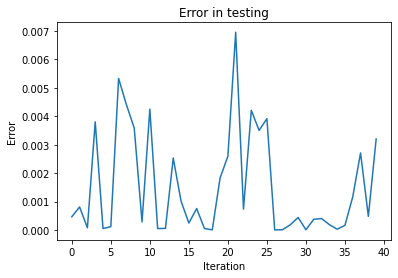

In [21]:
# Plotting testing error

plt.plot(error_data[0],error_data[1])
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error in testing")
plt.show()

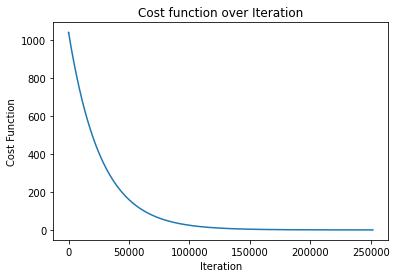

In [22]:
# Plot J(w) against iteration
plt.plot(cost_fn_data[0],cost_fn_data[4])
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost function over Iteration")
plt.show()

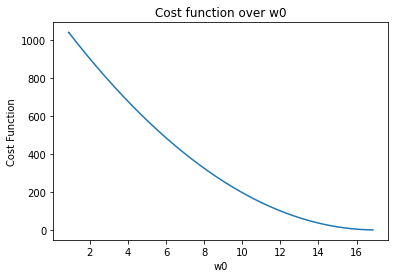

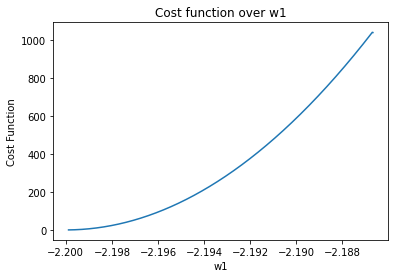

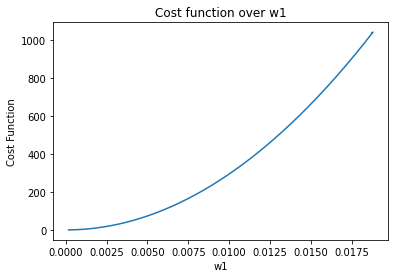

In [23]:
# Plot J(w) against w obtained in each iteration for Data 2

plt.plot(cost_fn_data[1],cost_fn_data[4])
plt.xlabel("w0")
plt.ylabel("Cost Function")
plt.title("Cost function over w0")
plt.show()

plt.plot(cost_fn_data[2],cost_fn_data[4])
plt.xlabel("w1")
plt.ylabel("Cost Function")
plt.title("Cost function over w1")
plt.show()

plt.plot(cost_fn_data[3],cost_fn_data[4])
plt.xlabel("w1")
plt.ylabel("Cost Function")
plt.title("Cost function over w1")
plt.show()

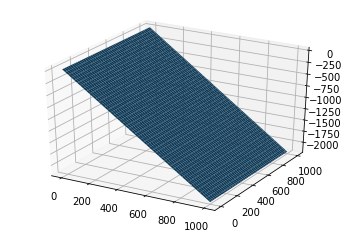

In [24]:
# Plotting the hyperplane

x1 = np.linspace(0,1000,100)
x2 = np.linspace(0,1000,100)
X1,X2 = np.meshgrid(x1,x2)
y = w[0] + w[1]*X1 + w[2]*X2
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(X1,X2,y)
plt.show()

#2. Analyze Data 3 using linear regression

Find the parameters using direct method and iterative methods.

Compare the time taken and space requirements of two approaches.

Describe the experimental procedures used.

Report the values of the hyperparameters and parameters of the model.

Analyze the performance of the model.

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [26]:
data_file_3 = pd.read_csv("data3.csv",header=None)

In [27]:
data_file_3.insert(0,"wo",1)
data3 = np.array(data_file_3)


In [28]:
X = np.array([i[:-1] for i in data3])
Y = np.array([i[-1:] for i in data3])

In [29]:
row = len(X)
col = len(X[0])
print(row,col)

200 51


In [31]:
# Direct Method
from datetime import datetime
start_direct = datetime.now() 

# w = ((X'X)^-1)X'y
weights = np.matmul( np.matmul(  np.linalg.inv( np.matmul(X.transpose(),X) ) , X.transpose() ) , Y )

stop_direct = datetime.now() - start_direct

print(stop_direct)
print(weights)

0:00:00.000921
[[1.17499365e-04]
 [3.00012352e+00]
 [1.30002413e+01]
 [4.00006608e+00]
 [7.99989876e+00]
 [1.10001828e+01]
 [1.79999616e+01]
 [1.40001142e+01]
 [1.59998704e+01]
 [2.99990180e+00]
 [1.10001483e+01]
 [1.80002202e+01]
 [3.00015611e+00]
 [1.29999149e+01]
 [2.00009267e+00]
 [8.99993966e+00]
 [1.50001011e+01]
 [3.00002222e+00]
 [1.69999253e+01]
 [1.29999781e+01]
 [1.79999930e+01]
 [1.30000006e+01]
 [8.99993925e+00]
 [1.30000514e+01]
 [1.00000901e+01]
 [2.00018564e+00]
 [1.30002698e+01]
 [1.99999128e+01]
 [1.00004043e+01]
 [1.30000325e+01]
 [1.19999244e+01]
 [5.00015111e+00]
 [1.40003348e+01]
 [4.00022142e+00]
 [1.60003623e+01]
 [5.00022019e+00]
 [3.99985959e+00]
 [1.49999665e+01]
 [5.99981920e+00]
 [4.00008941e+00]
 [1.29998624e+01]
 [6.00010566e+00]
 [6.00016352e+00]
 [1.69997806e+01]
 [7.99999846e+00]
 [3.00013981e+00]
 [3.99962459e+00]
 [8.00006693e+00]
 [1.80001574e+01]
 [1.19998188e+01]
 [6.00026240e+00]]


In [32]:
alpha_set_3 = [0.00000001,0.0000001,0.00001,0.0001,0.0005,0.001,0.005,0.01]
alpha_data_3 = [[],[]]
performance_data_3 = [[],[]]
for a in alpha_set_3:
  for j in range(50):
    np.random.shuffle(data3)
    training_set = data3[:int(0.7*len(data3))]
    testing_set = data3[int(0.7*len(data3)):]
    w = np.random.rand(col)
    performance = [[],[]]
    for i in range(len(training_set)):
      diff = training_set[i][-1] - np.inner(w,training_set[i][:-1])
      delta = a * diff * training_set[i][:-1]
      w += delta 
    
    cost_fn = 0

    for i in range(len(testing_set)):
      diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
      cost_fn += 0.5*diff**2
    performance[0].append(j)
    performance[1].append(cost_fn)
  performance_data_3[0].append(a)
  performance_data_3[1].append(performance)
  alpha_data_3[0].append(a)
  alpha_data_3[1].append(cost_fn)

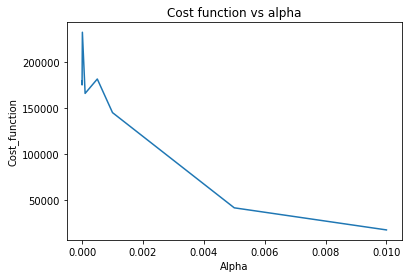

In [33]:
# Plotting cost_function versus alpha
fig = plt.figure()
# fig.set_size_inches(8,30)
ax = fig.gca()
ax.plot(alpha_data_3[0],alpha_data_3[1])
ax.set_xlabel("Alpha")
ax.set_ylabel("Cost_function")
ax.set_title("Cost function vs alpha")
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()

In [34]:
a = 0.01
training_set = data3[:int(0.6*(len(data3)))]
validation_set = data3[ int(0.6*(len(data3))) : int(0.8*(len(data3)))]
testing_set = data3[int(0.8*(len(data3))):]

In [56]:
start_iterative = datetime.now()

# Initializing the random weights
w = np.random.rand(col)

a = 0.01
j = 0

cost_fn_sum = 10
cost_fn_sum_new = 100

cost_fn_data = [[],[],[]]

while(abs(cost_fn_sum_new-cost_fn_sum)>1):

  cost_fn_sum = cost_fn_sum_new
  cost_fn_sum_new = 0
  
  # Training
  for i in range(len(training_set)):
    diff = training_set[i][-1] - np.inner(w,training_set[i][:-1])
    delta_w =  a * ( diff ) * training_set[i][:-1]
    w = w + delta_w
    #print(f"Loop : {j} ; Iteration : {i}; delta_w : {list(delta_w)} ; wnew : {list(w)}")

  # Validation
  for i in range(len(validation_set)):
    diff = validation_set[i][-1] - np.inner(w,validation_set[i][:-1])
    cost_fn_sum_new += diff**2


  cost_fn_data[0].append(j)
  cost_fn_data[1].append(w)
  cost_fn_data[2].append(0.5*cost_fn_sum_new)
  j+=1
  print(cost_fn_sum_new)
stop_iterative = datetime.now() - start_iterative

30037.20648645464
11630.619017529953
5055.460397083188
2447.044644198473
1285.681011233221
713.918907288425
411.15212582309687
242.6729914447827
145.7029627044633
88.56396171620472
54.32365618583247
33.55006703894857
20.829473924983773
12.984999575853632
8.121134925307928
5.092515129407961
3.200298807865961
2.014874342008888
1.2705870403254784


In [55]:
print(stop_iterative)
print(stop_direct)

0:00:00.016242
0:00:00.000921


Direct method took 921 microseconds
Iterative method took 16242 microseconds

In [41]:
print(w)

[3.51404929e-03 3.00746836e+00 1.29781259e+01 4.03206963e+00
 8.03353244e+00 1.10160241e+01 1.80089342e+01 1.39788406e+01
 1.59842891e+01 3.00686864e+00 1.09924847e+01 1.80412583e+01
 3.00252221e+00 1.30225321e+01 1.97889004e+00 8.96753027e+00
 1.49596639e+01 3.08019170e+00 1.69700372e+01 1.29609711e+01
 1.80207012e+01 1.29643860e+01 9.01676390e+00 1.30133243e+01
 9.96127964e+00 1.98347746e+00 1.29748441e+01 1.99512670e+01
 1.00288360e+01 1.30021476e+01 1.19742636e+01 5.00438801e+00
 1.39914318e+01 4.01138282e+00 1.59978516e+01 4.94086714e+00
 4.00515535e+00 1.49755509e+01 5.97487953e+00 3.97965543e+00
 1.30066475e+01 5.98663538e+00 6.00715961e+00 1.70320765e+01
 7.99519071e+00 2.99846507e+00 3.98665729e+00 7.97977518e+00
 1.79565782e+01 1.20217178e+01 5.94288239e+00]


In [42]:
# Testing
cost_fn_sum = 0
error_data = [[],[]]
for i in range(len(testing_set)):
  diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
  cost_fn_sum += diff**2
  error_data[0].append(i)
  error_data[1].append(0.5*(diff**2))
cost_fn_sum

1.25905192097575

In [43]:
# Values of Hyperparameters and parameter
print(f"The value of hyperparameter alpha is : {a}")
print()
print("The values of parameters are")
for i in range(col):
  print(f"w{i} is {w[i]}")

The value of hyperparameter alpha is : 0.01

The values of parameters are
w0 is 0.0035140492900212796
w1 is 3.007468359664496
w2 is 12.978125905532984
w3 is 4.03206962734958
w4 is 8.033532436450434
w5 is 11.016024064244835
w6 is 18.008934203400187
w7 is 13.978840649053733
w8 is 15.984289094811269
w9 is 3.006868638256221
w10 is 10.992484734312907
w11 is 18.041258254364863
w12 is 3.0025222073348345
w13 is 13.022532081143636
w14 is 1.9788900375515759
w15 is 8.967530274138348
w16 is 14.959663869816264
w17 is 3.080191699765342
w18 is 16.970037222932906
w19 is 12.960971081922647
w20 is 18.0207011994692
w21 is 12.964385991016934
w22 is 9.016763901303008
w23 is 13.0133242782504
w24 is 9.961279641405774
w25 is 1.9834774569218716
w26 is 12.974844058001874
w27 is 19.95126701047513
w28 is 10.028835993343348
w29 is 13.00214764923193
w30 is 11.974263627658795
w31 is 5.004388014781821
w32 is 13.991431798214279
w33 is 4.0113828223468415
w34 is 15.997851559499075
w35 is 4.940867135628561
w36 is 4.00515

# 3. Analyze Data 4 using linear regression

(a) Describe the experimental procedures used.

(b) Report the values of the parameters of the model.

(c) Analyze the performance of the model

In [46]:
data_file_4 = pd.read_csv("data4.csv",header=None)
data_file_4.insert(0,"wo",1)
data4 = np.array(data_file_4)

In [62]:
row = len(data4)
col = len(data4[0])

In [61]:
# Using K-fold cross validation
division = np.linspace(0,len(data4)-1,5)
folds_5 = [data4[int(division[i]):int(division[i+1])] for i in range(len(division)-1)]

In [82]:
alpha_set = [0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,1.2,1.5]
alpha_data_4 = [[],[]]
performance_data_4 = [[],[]]
for a in alpha_set:
  for j in range(len(folds_5)):
    testing_set = folds_5[j]
    w = np.random.rand(col-1)
    performance = [[],[]]
    i = 0
    while(i!=j & i < len(folds_5)):
      for k in range(len(folds_5[i])):
        diff = folds_5[i][j][-1] - np.inner(w,folds_5[i][j][:-1])
        delta = a * diff * folds_5[i][j][:-1]
        w += delta 
      i+=1
    cost_fn = 0

    for i in range(len(testing_set)):
      diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
      cost_fn += 0.5*diff**2
    performance[0].append(j)
    performance[1].append(cost_fn)
  performance_data_3[0].append(a)
  performance_data_3[1].append(performance)
  alpha_data_4[0].append(a)
  alpha_data_4[1].append(cost_fn)

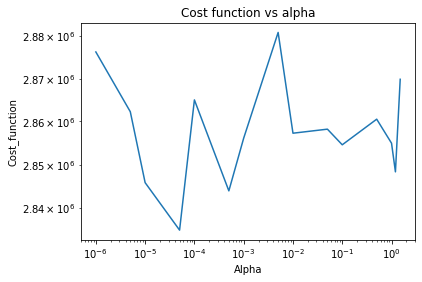

In [83]:
# Plotting cost_function versus alpha

fig = plt.figure()
ax = fig.gca()
ax.plot(alpha_data_4[0],alpha_data_4[1])
ax.set_xlabel("Alpha")
ax.set_ylabel("Cost_function")
ax.set_title("Cost function vs alpha")
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

In [84]:
training_data = data4[:int(0.6*len(data4))]
validation_data = data4[int(0.6*len(data4)):int(0.8*len(data4))]
testing_data = data4[int(0.8*len(data4)):]



In [104]:
# Initializing the random weights
w = np.random.rand(col-1)

a = 0.009
j = 0

cost_fn_sum = 10
cost_fn_sum_new = 100

cost_fn_data = [[],[],[]]

while(abs(cost_fn_sum_new-cost_fn_sum)!=0):

  cost_fn_sum = cost_fn_sum_new
  cost_fn_sum_new = 0
  
  # Training
  for i in range(len(training_data)):
    diff = training_data[i][-1] - np.inner(w,training_data[i][:-1])
    delta_w =  a * ( diff ) * training_data[i][:-1]
    w = w + delta_w
    #print(f"Loop : {j} ; Iteration : {i}; delta_w : {list(delta_w)} ; wnew : {list(w)}")

  # Validation
  for i in range(len(validation_data)):
    diff = validation_data[i][-1] - np.inner(w,validation_data[i][:-1])
    cost_fn_sum_new += diff**2


  cost_fn_data[0].append(j)
  cost_fn_data[1].append(w)
  cost_fn_data[2].append(0.5*cost_fn_sum_new)
  j+=1
  print(cost_fn_sum_new)

3818631.169526793
3325103.399120062
3247067.868220561
2629592.1608267976
3330177.797155919
2857437.706571312
2891845.692394232
2716131.120334368
2747531.804177118
2842386.732620407
2634262.9161999226
2708659.3458186467
2825026.1790174935
2548634.1055682506
2841636.4168232027
2655373.5054854085
2613181.335693826
2836431.648674271
2561821.0373157426
2746069.7170826606
2704275.5411036857
2622510.13388119
2750707.7821846576
2661101.0260577877
2658979.067659115
2727087.1431042026
2655856.1388871125
2688373.4306227905
2697167.2965075616
2664806.9646176253
2697493.635884098
2679112.713849969
2684166.8918966046
2683534.536541358
2681523.601816004
2689552.3925963202
2677507.778062464
2686563.4662076724
2684560.7894577077
2679835.334141558
2688917.7283166586
2679744.2431465825
2683814.8318002056
2686557.2556391233
2680302.964714387
2685611.473121058
2683216.399397404
2682850.0861964016
2685147.8089041472
2682174.591557793
2684411.42517156
2683580.2523639686
2683260.7093414664
2684256.81125697
26

In [105]:
# parameters of model

print(w)

[-10.98495395  10.26470803  -0.40053347  11.22877645   4.4833637
   5.74479031  -1.38191244  -2.71052634   6.92128388  12.42460318
  17.76745881  17.14426074  -1.08863675   8.90200221  17.83313705
   4.43774378   3.90180925  -2.64675538  12.21215999 -13.69341449
  -7.55252171  12.25214233 -13.70608023 -10.7278726   11.9541371
   4.13103761  -1.53637928  -5.91440316 -16.78195021   1.72827963
  10.50491292  10.52770791  21.9456118    4.16995134  18.9201467
  38.66348612   6.56008358  17.54100824   8.7098844   16.40877112
  39.66155172 -12.22288604  36.31803871   5.26553483  -1.33791208
   7.66941992   8.14241341  17.28957955  13.50238283   1.67973967
  12.48252969  13.16732531   3.08949102   9.62428599  -9.01736438
  23.4418023   -3.44579322  11.33131289   5.19729779 -15.86901846
   7.60037759  26.82429427  20.05255315   6.91675242  -7.10526401
 -19.90087337  20.08974684  -1.45632613  24.00339276  11.08279696
   3.00703669   4.25532162  14.32560743  16.26907095  -2.87609282
  17.09017823

In [106]:
# Testing
cost_fn_sum = 0
error_data = [[],[]]
for i in range(len(testing_data)):
  diff = testing_data[i][-1] - np.inner(w,testing_data[i][:-1])
  cost_fn_sum += diff**2
  error_data[0].append(i)
  error_data[1].append(0.5*(diff**2))
cost_fn_sum

2777302.2751824306

# 4. Analyze Computer hardware data set using linear regression (download data from UCI web repository)

Analyze the data with normalization and without normalization.

Describe how you applied normalization techniques on training and testing data.

Apply hold out method, random subsampling and k fold cross validation.

Assess the performance of the model.

Report the values of the hyperparameters and the parameters of the model.

Apply batch as well as online optimization algorithms and compare their performance in terms of time and MSE.

In [16]:
import numpy as np

In [10]:
import pandas as pd
computer_data = pd.read_csv("machine.data",header=None)

In [11]:
computer_data

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [12]:
computer_data = computer_data.drop(columns=[0])

In [13]:
computer_data[1] = 1

In [14]:
computer_data

,1,2,3,4,5,6,7,8,9
0,1,125,256,6000,256,16,128,198,199
1,1,29,8000,32000,32,8,32,269,253
2,1,29,8000,32000,32,8,32,220,253
3,1,29,8000,32000,32,8,32,172,253
4,1,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...
204,1,124,1000,8000,0,1,8,42,37
205,1,98,1000,8000,32,2,8,46,50
206,1,125,2000,8000,0,2,14,52,41
207,1,480,512,8000,32,0,0,67,47


In [17]:
data = np.array(computer_data)

In [40]:
# Holdout method
def hold_out(data,normalization=0,online=0):
  alpha_set = [0.00000001,0.0000001,0.00001,0.0001,0.0005,0.001,0.005,0.01]
  alpha_data = [[],[]]
  for a in alpha_set:
    np.random.shuffle(data)
    training_set = data[:int(0.7*len(data))]
    testing_set = data[int(0.7*len(data)):]
    if normalization:
      for i in range(len(training_set[0])):
        mean = np.mean(training_set[:,i])
        std = np.std(training_set[:,i])
        std = 1 if std == 0 else std
        training_set[:,i] = (training_set[:,i] - mean)/std
        testing_set[:,i] = (testing_set[:,i] - mean)/std
    
    w = np.random.rand(len(training_set[0])-1)
    delta = 0
    for i in range(len(training_set)):
      diff = training_set[i][-1] - np.inner(w,training_set[i][:-1])
      delta += a * diff * training_set[i][:-1]
      w += delta
      if online:  
        delta = 0
    
    cost_fn = 0

    for i in range(len(testing_set)):
      diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
      cost_fn += 0.5*diff**2
    alpha_data[0].append(a)
    alpha_data[1].append(cost_fn)
  return w,alpha_data 

In [41]:
# Random Sampling
def random_sampling(data,normalization=0,online=0):
  alpha_set = [0.00000001,0.0000001,0.00001,0.0001,0.0005,0.001,0.005,0.01]
  alpha_data = [[],[]]
  for a in alpha_set:
    for j in range(30):
      np.random.shuffle(data)
      training_set = data[:int(0.7*len(data))]
      testing_set = data[int(0.7*len(data)):]
      if normalization:
        for i in range(len(training_set[0])):
          mean = np.mean(training_set[:,i])
          std = np.std(training_set[:,i])
          std = 1 if std == 0 else std
          training_set[:,i] = (training_set[:,i] - mean)/std
          testing_set[:,i] = (testing_set[:,i] - mean)/std
      
      w = np.random.rand(len(training_set[0])-1)

      for i in range(len(training_set)):
        diff = training_set[i][-1] - np.inner(w,training_set[i][:-1])
        delta += a * diff * training_set[i][:-1]
        w += delta
        if online:  
          delta = 0
      
      cost_fn = 0

      for i in range(len(testing_set)):
        diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
        cost_fn += 0.5*diff**2
    alpha_data[0].append(a)
    alpha_data[1].append(cost_fn)
  return w,alpha_data 

In [42]:
# K fold
def k_fold(data,online=0):
  division = np.linspace(0,len(data)-1,10)
  folds_5 = [data[int(division[i]):int(division[i+1])] for i in range(len(division)-1)]
  alpha_set = [0.00000001,0.0000001,0.00001,0.0001,0.0005,0.001,0.005,0.01]
  alpha_data = [[],[]]
  for a in alpha_set:
    for j in range(len(folds_5)):
      testing_set = folds_5[j]
      
      w = np.random.rand(len(training_set[0])-1)

      i = 0
      while(i!=j & i < len(folds_5)):
        for k in range(len(folds_5[i])):
          diff = folds_5[i][j][-1] - np.inner(w,folds_5[i][j][:-1])
          delta = a * diff * folds_5[i][j][:-1]
          w += delta
          if online:
            delta = 0
      i+=1
      
      cost_fn = 0

      for i in range(len(testing_set)):
        diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
        cost_fn += 0.5*diff**2
    alpha_data[0].append(a)
    alpha_data[1].append(cost_fn)
  return w,alpha_data 

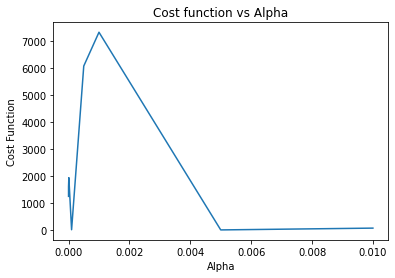

In [44]:
import matplotlib.pyplot as plt
# Holdout with normalization with online algorithm
w,alpha_data = hold_out(data,normalization=1,online=1)
plt.plot(alpha_data[0],alpha_data[1])
plt.xlabel("Alpha")
plt.ylabel("Cost Function")
plt.title("Cost function vs Alpha")
plt.show()

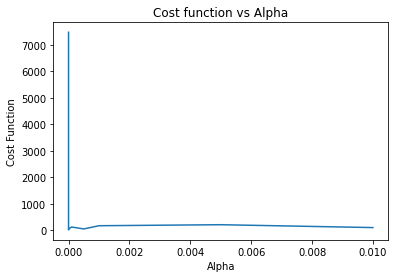

In [45]:
# Holdout with normalization with batch algorithm
w,alpha_data = hold_out(data,normalization=1)
plt.plot(alpha_data[0],alpha_data[1])
plt.xlabel("Alpha")
plt.ylabel("Cost Function")
plt.title("Cost function vs Alpha")
plt.show()

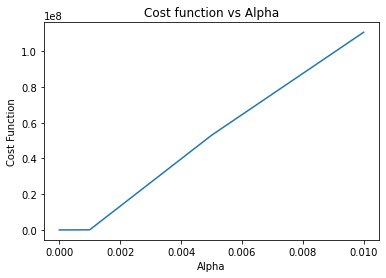

In [46]:
# Holdout without normalization with batch algorithm
w,alpha_data = hold_out(data)
plt.plot(alpha_data[0],alpha_data[1])
plt.xlabel("Alpha")
plt.ylabel("Cost Function")
plt.title("Cost function vs Alpha")
plt.show()

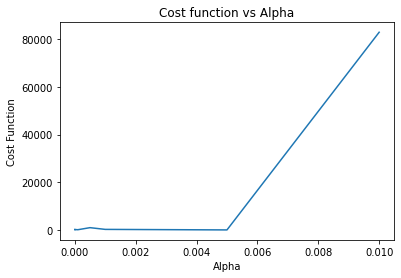

In [48]:

# Holdout without normalization with online algorithm
w,alpha_data = hold_out(data,online=1)
plt.plot(alpha_data[0],alpha_data[1])
plt.xlabel("Alpha")
plt.ylabel("Cost Function")
plt.title("Cost function vs Alpha")
plt.show()

In [145]:
# Training
def training(data,normalization=0,online=0):
  if normalization and online:
    a = 0.005
  elif normalization:
    a = 0.00001

  j = 0
  
  cost_fn_sum = 10
  cost_fn_sum_new = 100

  cost_fn_data = [[],[],[]]
  training_set = data[:int(0.6*len(data))]
  validation_set = data[int(0.6*len(data)):int(0.8*len(data))]

  w = np.random.rand(len(training_set[0])-1)
  if normalization:
    for i in range(len(training_set[0])):
      mean = np.mean(training_set[:,i])
      std = np.std(training_set[:,i])
      std = 1 if std == 0 else std
      training_set[:,i] = (training_set[:,i] - mean)/std
      validation_set[:,i] = (validation_set[:,i] - mean)/std
  while(abs(cost_fn_sum_new-cost_fn_sum)!=0):
    
    cost_fn_sum = cost_fn_sum_new
    cost_fn_sum_new = 0
    delta = 0
    for i in range(len(training_set)):
      diff = training_set[i][-1] - np.inner(w,training_set[i][:-1])
      #print(training_set[i][-1])
      delta += a * diff * training_set[i][:-1]
      #print(delta)
      w += delta
      #print(w)
      if online:  
        delta = 0


    for i in range(len(validation_set)):
      diff = validation_set[i][-1] - np.inner(w,validation_set[i][:-1])
      cost_fn_sum_new += diff**2

    cost_fn_data[0].append(j)
    cost_fn_data[1].append(w)
    cost_fn_data[2].append(0.5*cost_fn_sum_new)
    j+=1
    print(cost_fn_sum_new)
  return w,cost_fn_data,mean,std


In [146]:
# Training the normalized data with online alogrithm
from datetime import datetime
data = np.array(computer_data)
start_online = datetime.now()
w,cost_fn_data,mean,std = training(data,normalization=1,online=1)
stop_online = datetime.now() - start_online

2.833229063994317
1.8528708839416135
1.8650820269258221
1.909596125188093
1.9620239641527
2.0214012827023113
2.086114795910419
2.1545568827287562
2.225428842619527
2.297733057855047
2.370708177710897
2.443770228298356
2.516468116025521
2.5884512449119956
2.659445994993364
2.7292384977333484
2.7976618800564337
2.8645866995403333
2.9299136783506095
2.993568109039607
3.0554954886754513
3.1156580650346477
3.174032067524105
3.2306054580866004
3.2853760817131694
3.338350127868506
3.389540836919811
3.438967402158085
3.486654030027145
3.5326291299985937
3.5769246120443454
3.619575274497099
3.660618268706375
3.7000926296201984
3.738038863485869
3.7744985854395283
3.809514200968944
3.843128626178973
3.875385042532743
3.9063266823334697
3.9359966416892744
3.9644377180939094
3.991692270080324
4.017802096676653
4.0428083346271135
4.066751371541599
4.089670773314019
4.111605224305402
4.132592478926991
4.152669323383767
4.1718715464521985
4.190233918269061
4.207790176202197
4.224573016960124
4.240614

In [148]:
# Training the normalized data with batch alogrithm
from datetime import datetime
data = np.array(computer_data)
start_batch = datetime.now()
w1,cost_fn_data,mean,std = training(data,normalization=1,online=0)
stop_batch = datetime.now() - start_batch

Streaming output truncated to the last 5000 lines.
2.7276284824143007
2.728828964376869
2.730024091921473
2.7312138748218233
2.7323983230908153
2.7335774469749103
2.7347512569485413
2.735919763708475
2.737082978168578
2.7382409114543727
2.739393574897842
2.7405409800323475
2.7416831385875673
2.7428200624844403
2.7439517638305015
2.7450782549149393
2.7461995482039443
2.7473156563361236
2.748426592117963
2.749532368519305
2.750632998669081
2.7517284958509567
2.7528188734991454
2.753904145194232
2.754984324659084
2.756059425754982
2.7571294624775
2.7581944489528074
2.7592543994337997
2.7603093282963913
2.7613592500359236
2.7624041792634513
2.7634441307023407
2.7644791191847577
2.765509159648306
2.7665342671325797
2.767554456776058
2.7685697438127863
2.769580143569177
2.770585671461008
2.771586342990327
2.772582173742447
2.773573179383044
2.7745593756553126
2.775540778377004
2.7765174034378077
2.777489266796496
2.7784563844783827
2.7794187725725306
2.780376447229314
2.78132942465784
2.7822

In [149]:
print(stop_online)
print(stop_batch)

0:00:02.538216
0:00:16.955720


In [150]:
# Testing
testing_data = data[int(0.8*len(data)):]
for i in range(len(testing_data[0])):
  testing_data[:,i] = (testing_data[:,i] - mean)/std
cost_fn_sum = 0
error_data = [[],[]]
for i in range(len(testing_data)):
  diff = testing_data[i][-1] - np.inner(w1,testing_data[i][:-1])
  cost_fn_sum += diff**2
  error_data[0].append(i)
  error_data[1].append(0.5*(diff**2))
cost_fn_sum

194030.6459516556